In [216]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv(r"C:\Users\hp\Downloads\Excel\QVI_transaction_data.csv")
df2 = pd.read_csv(r"C:\Users\hp\Downloads\Excel\QVI_purchase_behaviour.csv")

df1


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,8/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,8/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,3/9/2019,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,8/13/2018,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,11/6/2018,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,12/27/2018,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [217]:
#-----------BASIC DATA EXPLORATION---------------------------
print('Rows: ',df1.shape[0],   'Columns: ', df1.shape[1])

Rows:  264836 Columns:  8


In [218]:
df1.info()
df1.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [219]:
# Converting date to datetime
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [220]:
# Range of dataset
date_diff = (df1['DATE'].max() - df1['DATE'].min()).days/30.44
date_diff
print((df1['DATE'].max() - df1['DATE'].min()).days )

364


In [221]:
# Dropping irrelevant columns
df1.drop(['PROD_NBR'], axis = 1, inplace = True)
print('Dropped product number columns')

Dropped product number columns


In [222]:
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [223]:
# There are 264836 transactions, over the span of 364 days

In [224]:
unique = df1['PROD_NAME'].unique()
num_of_stores = df1['STORE_NBR'].nunique()

In [225]:
# Data Cleaning

In [226]:
# Checking for missing data
print(df1.isnull().any())
print('No Missing Data')

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool
No Missing Data


In [227]:
# Fixing column names
print(df1.columns.tolist())
df1.columns_new_name = {
    'DATE': 'date',
    'STORE_NBR': 'store_number',
    'LYLTY_CARD_NBR': 'loyalty_card_number',
    'TXN_ID': 'transaction_id',
    'PROD_NAME': 'name',
    'PROD_QTY': 'quantity',
    'TOT_SALES': 'total_sales',
}
df1.rename(columns=df1.columns_new_name, inplace=True)
print('FIX APPLIED')
print(df1.columns.tolist())

['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']
FIX APPLIED
['date', 'store_number', 'loyalty_card_number', 'transaction_id', 'name', 'quantity', 'total_sales']


C:\Users\hp\AppData\Local\Temp\ipykernel_12212\1085115427.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.columns_new_name = {


In [228]:
# Fixing product_names
new_names = {
    'Natural Chip        Compny SeaSalt175g' : 'Natural Chip Company Sea Salt 175g',
    'CCs Nacho Cheese 175' : 'CCs Nacho Cheese 175g',
    'Smiths Crinkle Cut  Chips Chicken 170g' : 'Smiths Crinkle Cut Chips Chicken 170g',
    'Smiths Chip Thinly  S/Cream&Onion 175g' : 'Smiths Chip Thinly Sour Cream & Onions 175g',
    'Kettle Tortilla ChpsHny&Jlpno Chili 150g': 'Kettle Tortilla Chips Honey & Jelly Potato Chips 150g',
    'Old El Paso Salsa  Dip Tomato Mild 300g' : 'Old El Paso Salsa Dip Tomato Mild 300g',
    'Smiths Crinkle Chips Salt & Vinegar 330g': 'Smiths Crinkle Cut Chips Salt & Vinegar 330g',
    'Grain Waves         Sweet Chilli 210g' : 'Grain Waves Sweet Chilli 210g',
    'Doritos Corn Chip Mexican Jalapeno 150g': 'Doritos Corn Chip Mexican Jalapeno 150g',
    'Grain Waves Sour    Cream&Chives 210G' : 'Grain Waves Sour Cream & Chives 210g',
    'Kettle Sensations  Siracha Lime 150g' : 'Kettle Sensations Siracha Lime 150g',
    'wisties Cheese     270g': 'Twisties Cheese 270g',
    'WW Crinkle Cut      Chicken 175g': 'WW Crinkle Cut Chicken 175g',
    'Thins Chips Light&  Tangy 175g': 'Thins Chips Light & Tangy 175g',
    'CCs Original 175g': 'CCs Original 175g',
    'Burger Rings 220g':'Burger Rings 220g',
    'NCC Sour Cream &    Garden Chives 175g': 'NCC Sour Cream & Garden Chives 175g',
    'Doritos Corn Chip Southern Chicken 150g': 'Doritos Corn Chip Southern Chicken 150g',
  	'Cheezels Cheese Box 125g': 'Cheezels Cheese Box 125g',
    'Smiths Crinkle      Original 330g' : 'Smiths Crinkle Cut Chips Original 330g',
    'Infzns Crn Crnchers Tangy Gcamole 110g': 'Infuzions Corn Crunchers Tangy Guacamole 110g',
    'Kettle Sea Salt     And Vinegar 175g': 'Kettle Sea Salt & Vinegar 175g',
    'Smiths Chip Thinly  Cut Original 175g': 'Smiths Chip Thinly Cut Original 175g',
    'Kettle Original 175g':'Kettle Original 175g',
    'Red Rock Deli Thai  Chilli&Lime 150g': 'Red Rock Deli Thai Chilli & Lime 150g',
    'Pringles Sthrn FriedChicken 134g': 'Pringles Sthrn Fried Chicken 134g',
    'Pringles Sweet&Spcy BBQ 134g' : 'Pringles Sweet & Spicy BBQ 134g',
    'Red Rock Deli SR    Salsa & Mzzrlla 150g': 'Red Rock Deli SR salsa & Mozzorella',
    'Thins Chips         Originl saltd 175g' : 'Smiths Thinly Cut Chips Original Salt 175g',
    'Red Rock Deli Sp    Salt & Truffle 150G' : 'Red Rock Deli Salt & Truffle 150g', 
    'Smiths Thinly       Swt Chli&S/Cream175G' : 'Smiths Thinly Cut Sweet Chili SOur & Cream 175g',
    'Kettle Chilli 175g': 'Kettle Chilli 175g',
    'Doritos Mexicana    170g': 'Doritos Mexicana 170g',
    'Smiths Crinkle Cut  French OnionDip 150g': 'Smiths Crinkle Cut French Onion Dip 150g',
    'Natural ChipCo      Hony Soy Chckn175g': 'Natural Chip Company Honey Soy Chicken 175g',
    'Dorito Corn Chp     Supreme 380g': 'Doritos Corn Chips Supreme 380g',
    'Twisties Chicken270g': 'Twisties Chicken 270g',
    'Smiths Thinly Cut   Roast Chicken 175g': 'Smiths Thinly Cut Roast Chicken 175g',
    'Smiths Crinkle Cut  Tomato Salsa 150g': 'Smiths Crinkle Cut Tomato Salsa 150g',
    'Kettle Mozzarella   Basil & Pesto 175g': 'Kettle Mozzarella Basil & Pesto 175g',
    'Infuzions Thai SweetChili PotatoMix 110g': 'Infuzions Thai Sweet Chili Potato Mix 110g',
    'Kettle Sensations   Camembert & Fig 150g': 'Kettle Sensations Camembert & Fig 150g',
    'Smith Crinkle Cut   Mac N Cheese 150g': 'Smiths Crinckle Cut Mac & Cheess 150g',
    'Kettle Honey Soy    Chicken 175g': 'Kettle Honey Soy Chicken 175g',
    'Thins Chips Seasonedchicken 175g': 'Thins Chips Seasoned Chicken 175g',
    'Smiths Crinkle Cut  Salt & Vinegar 170g': 'Smiths Crinkle Cut Salt & Vinegar 170g',
    'Infuzions BBQ Rib   Prawn Crackers 110g': 'Infuzions BBQ Rib Prawn Crackers 110g',
    'GrnWves Plus Btroot & Chilli Jam 180g': 'Grain Waves Plus Beetroot & Chilli Jam 180g',
    'Tyrrells Crisps     Lightly Salted 165g': 'Tyrrells Crisps Lightly Salted 165g',
    'Kettle Sweet Chilli And Sour Cream 175g': 'Kettle Sweet Chilli & Sour Cream 175g',
    'Doritos Salsa       Medium 300g': 'Doritos Salsa Medium 300g',
    'Kettle 135g Swt Pot Sea Salt': 'Kettle Sweet Potato Sea Salt 135g',
    'Pringles SourCream  Onion 134g' : 'Pringles Sour Cream & Onions 134g',
    'Doritos Corn Chips  Original 170g': 'Doritos Corn Chips Original 170g',
    'Twisties Cheese     Burger 250g': 'Twisties Cheese Burger 250g',
    'Old El Paso Salsa   Dip Chnky Tom Ht300g': 'Old El Paso Salsa Dip Chunky Tomato 300g',
    'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g': 'Cobs Popd Sweet & Chili, Sour & Cream 110g',
    'Woolworths Mild     Salsa 300g': 'Woolworths Mild Salsa 300g',
    'Natural Chip Co     Tmato Hrb&Spce 175g': 'Natural Chip Company Tomato Herb & Spice 175g',
    'Smiths Crinkle Cut  Chips Original 170g': 'Smiths Crinkle Cut Chips Original 170g',
    'Cobs Popd Sea Salt  Chips 110g': 'Cobs Popd Sea Salt Chips 110g',
    'Smiths Crinkle Cut  Chips Chs&Onion170g': 'Smiths Crinkle Cut Chips Cheddar & Onion 170g',
    'French Fries Potato Chips 175g': 'French Fries Potato Chips 175g',
    'Old El Paso Salsa   Dip Tomato Med 300g': 'Old El Paso Salsa Dip Tomato Medium 300g',
    'Doritos Corn Chips  Cheese Supreme 170g': 'Doritos Corn Chips Cheese Supreme 170g',
    'Pringles Original   Crisps 134g': 'Pringles Original Crisps 134g',
    'RRD Chilli&         Coconut 150g': 'Red Rock Deli Chilli & Coconut 150g',
    'WW Original Corn    Chips 200g': 'WW Original Corn Chips 200g',
    'Thins Potato Chips  Hot & Spicy 175g': 'Smiths Thin Potato Chips',
    'Cobs Popd Sour Crm  &Chives Chips 110g': 'Cobs Popd Sour Cream & Chives Chips 110g',
    'Smiths Crnkle Chip  Orgnl Big Bag 380g': 'Smiths Crinkle Cut Chips Original Big Bag 380g',
    'Doritos Corn Chips  Nacho Cheese 170g': 'Doritos Nacho Cheese Corn Chips 170g',
    'Kettle Sensations   BBQ&Maple 150g': 'Kettle Sensations BBQ & Maple 150g',
    'WW D/Style Chip     Sea Salt 200g': 'WW D/Style Chip Sea Salt 200g',
    'Pringles Chicken    Salt Crips 134g': 'Pringles Chicken Salt Crisps 134g',
    'WW Original Stacked Chips 160g': 'WW Original Stacked Chips 160g ',
    'Smiths Chip Thinly  CutSalt/Vinegr175g': 'Smiths Chip Thinly Cut Salt & Vinegar 175g',
    'Cheezels Cheese 330g': 'Cheezels Cheese 330g',
    'Tostitos Lightly    Salted 175g': 'Tostitos Lightly Salted 175g',
    'Thins Chips Salt &  Vinegar 175g': 'Smiths Thinly Cut Chips Salt & Vinegar 175g',
    'Smiths Crinkle Cut  Chips Barbecue 170g': 'Smiths Crinkle Cut Chips Barbecue 170g',
    'Cheetos Puffs 165g': 'Cheetos Puffs 165g',
    'RRD Sweet Chilli &  Sour Cream 165g': 'Red Rock Deli Sweet Chilli & Sour Cream 165g',
    'WW Crinkle Cut      Original 175g': 'WW Crinkle Cut Original 175g',
    'Tostitos Splash Of  Lime 175g': 'Tostitos Splash Of Lime 175g',
    'Woolworths Medium   Salsa 300g': 'Woolworths Medium Salsa 300g',
    'Kettle Tortilla ChpsBtroot&Ricotta 150g': 'Kettle Tortilla Chips Beetroot & Ricotta 150g',
    'CCs Tasty Cheese    175g': 'CCs Tasty Cheese 175g',
    'Woolworths Cheese   Rings 190g': 'Woolworths Cheese Rings 190g',
    'Tostitos Smoked     Chipotle 175g' : 'Tostitos Smoked Chipotle 175g',
    'Pringles Barbeque   134g': 'Pringles Barbeque 134g',
    'WW Supreme Cheese   Corn Chips 200g': 'WW Supreme Cheese Corn Chips 200g',
    'Pringles Mystery    Flavour 134g': 'Pringles Mystery Flavour 134g',
    'Tyrrells Crisps     Ched & Chives 165g': 'Tyrrells Crisps Cheddar & Chives 165g',
    'Snbts Whlgrn Crisps Cheddr&Mstrd 90g': 'Snbts Wholegrain Crisps Cheddar & Mustard 90g',
    'Cheetos Chs & Bacon Balls 190g': 'Cheetos Cheese & Bacon Balls 190g',
    'Pringles Slt Vingar 134g': 'Pringles Salt & Vinegar 134g',
    'Infuzions SourCream&Herbs Veg Strws 110g': 'Infuzions Sour Cream & Herbs Vegetable Straws 110g',
    'Kettle Tortilla ChpsFeta&Garlic 150g':'Kettle Tortilla Chips Feta & Garlic 150g' ,
    'Infuzions Mango     Chutny Papadums 70g': 'Infuzions Mango Chutney Papadums 70g',
    'RRD Steak &         Chimuchurri 150g': 'Red Rock Deli Steak & Chimuchurri 150g',
    'RRD Honey Soy       Chicken 165g': 'Red Rock Deli Honey Soy Chicken 165g',
    'Sunbites Whlegrn    Crisps Frch/Onin 90g': 'Sunbites Wholegrain Crisps French & Onion 90g',
    'RRD Salt & Vinegar  165g': 'Red Rock Deli Salt & Vinegar 165g',
    'Doritos Cheese      Supreme 330g': 'Doritos Cheese Supreme 330g',
    'Smiths Crinkle Cut  Snag&Sauce 150g': 'Smiths Crinkle Cut Snag & Sauce 150g',
    'WW Sour Cream &OnionStacked Chips 160g' : 'WW Sour Cream & Onions Stacked Chips 160g',
    'RRD Lime & Pepper   165g': 'Red Rock Deli Lime & Pepper 165g',
    'Natural ChipCo Sea  Salt & Vinegr 175g': 'Natural Chip Company Sea Salt & Vinegar 175g',
    'Red Rock Deli Chikn&Garlic Aioli 150g': 'Red Rock Deli Chicken & Garlic Aioli 150g',
    'RRD SR Slow Rst     Pork Belly 150g': 'Red Rock Deli SR Slow Roast Pork Belly 150g',
	  'Smiths Crinkle Original 330g': 'Smiths Crinkle Cut Chips Original 330g',
    'Doritos Salsa Mild  300g': 'Doritos Salsa Mild 300g',
    'Smith Crinkle Cut   Bolognese 150g': 'Smiths Crinkle Cut Bolognese 150g',
}


In [229]:
df1['name'].head(20)

0       Natural Chip        Compny SeaSalt175g
1                     CCs Nacho Cheese    175g
2       Smiths Crinkle Cut  Chips Chicken 170g
3       Smiths Chip Thinly  S/Cream&Onion 175g
4     Kettle Tortilla ChpsHny&Jlpno Chili 150g
5     Old El Paso Salsa   Dip Tomato Mild 300g
6     Smiths Crinkle Chips Salt & Vinegar 330g
7        Grain Waves         Sweet Chilli 210g
8      Doritos Corn Chip Mexican Jalapeno 150g
9        Grain Waves Sour    Cream&Chives 210G
10    Smiths Crinkle Chips Salt & Vinegar 330g
11       Kettle Sensations   Siracha Lime 150g
12                    Twisties Cheese     270g
13            WW Crinkle Cut      Chicken 175g
14              Thins Chips Light&  Tangy 175g
15                           CCs Original 175g
16                           Burger Rings 220g
17      NCC Sour Cream &    Garden Chives 175g
18     Doritos Corn Chip Southern Chicken 150g
19                    Cheezels Cheese Box 125g
Name: name, dtype: object

In [230]:
df1['name']= df1['name'].replace(new_names)

In [231]:
print('PRODUCT NAMES FIXED')

PRODUCT NAMES FIXED


In [232]:
df1['name'].head(20)

0                    Natural Chip Company Sea Salt 175g
1                              CCs Nacho Cheese    175g
2                 Smiths Crinkle Cut Chips Chicken 170g
3           Smiths Chip Thinly Sour Cream & Onions 175g
4     Kettle Tortilla Chips Honey & Jelly Potato Chi...
5              Old El Paso Salsa   Dip Tomato Mild 300g
6          Smiths Crinkle Cut Chips Salt & Vinegar 330g
7                         Grain Waves Sweet Chilli 210g
8               Doritos Corn Chip Mexican Jalapeno 150g
9                  Grain Waves Sour Cream & Chives 210g
10         Smiths Crinkle Cut Chips Salt & Vinegar 330g
11                Kettle Sensations   Siracha Lime 150g
12                             Twisties Cheese     270g
13                          WW Crinkle Cut Chicken 175g
14                       Thins Chips Light & Tangy 175g
15                                    CCs Original 175g
16                                    Burger Rings 220g
17                  NCC Sour Cream & Garden Chiv

In [233]:
df2.shape

(72637, 3)

In [234]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [235]:
# Fixing column names
df2.columns.tolist()
new_column_names = {
    'LYLTY_CARD_NBR' : 'loyalty_card_number',
    'LIFESTAGE' :  'lifestage',
    'PREMIUM_CUSTOMER': 'customer_class'
}
df2.rename(columns = new_column_names, inplace = True)
df2

,loyalty_card_number,lifestage,customer_class
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [236]:
df2['loyalty_card_number'].nunique()

72637

In [237]:
# There are 72637 unique customers

In [238]:
merged = pd.merge(df1,df2, on = 'loyalty_card_number', how = 'left')

In [239]:
merged

,date,store_number,loyalty_card_number,transaction_id,name,quantity,total_sales,lifestage,customer_class
0,2018-10-17,1,1000,1,Natural Chip Company Sea Salt 175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,Smiths Chip Thinly Sour Cream & Onions 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,Kettle Tortilla Chips Honey & Jelly Potato Chi...,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,Kettle Sweet Chilli & Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [240]:
merged.groupby('store_number')['total_sales'].mean()

store_number
1      4.177312
2      3.964032
3      8.523602
4      8.729231
5      6.980749
         ...   
268    4.763828
269    6.983074
270    6.928804
271    7.019350
272    8.266341
Name: total_sales, Length: 272, dtype: float64

In [241]:
# Adding new column for better analysis
merged['year'] =merged['date'].dt.year
merged['month'] = merged['date'].dt.month
merged['quarter'] = merged['date'].dt.quarter
month_names = { 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 
               8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
merged['month_name'] = merged['month'].map(month_names)

In [242]:
merged

,date,store_number,loyalty_card_number,transaction_id,name,quantity,total_sales,lifestage,customer_class,year,month,quarter,month_name
0,2018-10-17,1,1000,1,Natural Chip Company Sea Salt 175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018,10,4,October
1,2019-05-14,1,1307,348,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019,5,2,May
2,2019-05-20,1,1343,383,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019,5,2,May
3,2018-08-17,2,2373,974,Smiths Chip Thinly Sour Cream & Onions 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,2018,8,3,August
4,2018-08-18,2,2426,1038,Kettle Tortilla Chips Honey & Jelly Potato Chi...,3,13.8,MIDAGE SINGLES/COUPLES,Budget,2018,8,3,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,Kettle Sweet Chilli & Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,2019,3,1,March
264832,2018-08-13,272,272358,270154,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,2018,8,3,August
264833,2018-11-06,272,272379,270187,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,2018,11,4,November
264834,2018-12-27,272,272379,270188,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,2018,12,4,December


In [243]:
# Checking for Missing Values
merged.isnull().any()

date                   False
store_number           False
loyalty_card_number    False
transaction_id         False
name                   False
quantity               False
total_sales            False
lifestage              False
customer_class         False
year                   False
month                  False
quarter                False
month_name             False
dtype: bool

In [244]:
# No empty data

In [245]:
# Checking for duplicate values
def find_duplicate_rows(merged):
    return merged[merged.duplicated()]
find_duplicate_rows(merged)

,date,store_number,loyalty_card_number,transaction_id,name,quantity,total_sales,lifestage,customer_class,year,month,quarter,month_name
124845,2018-10-01,107,107024,108462,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium,2018,10,4,October


In [246]:
# Dropped duplicate value
merged = merged.drop_duplicates()

In [247]:
# Checking for duplicates again
def find_duplicate_rows(merged):
    return merged[merged.duplicated()]
find_duplicate_rows(merged)

,date,store_number,loyalty_card_number,transaction_id,name,quantity,total_sales,lifestage,customer_class,year,month,quarter,month_name


In [248]:
# One duplicate data found and dropped

In [249]:
merged['date'].max() - merged['date'].min() 

Timedelta('364 days 00:00:00')

In [250]:
# Date Range of dataset is 364 days

In [251]:
# CUSTOMER SEGMENTATION ANALYSIS

In [252]:
#Metrics by Life stage

In [253]:
segment_analysis = merged.groupby('lifestage').agg({
    'loyalty_card_number': 'nunique',  # numberof unique customers
    'transaction_id' : 'nunique',  # Total transactions
    'total_sales' : ['sum','mean'], #Revenue Metrics
    'quantity' : 'sum'  #items purchased
}).round(2)
print(segment_analysis)

                       loyalty_card_number transaction_id total_sales        \
                                   nunique        nunique         sum  mean   
lifestage                                                                     
MIDAGE SINGLES/COUPLES                7275          24949   184751.30  7.36   
NEW FAMILIES                          2549           6896    50433.45  7.29   
OLDER FAMILIES                        9780          48126   353767.20  7.28   
OLDER SINGLES/COUPLES                14609          54147   402420.75  7.39   
RETIREES                             14805          49512   366470.90  7.36   
YOUNG FAMILIES                        9178          43242   316160.10  7.25   
YOUNG SINGLES/COUPLES                14441          36255   260405.30  7.16   

                       quantity  
                            sum  
lifestage                        
MIDAGE SINGLES/COUPLES    47721  
NEW FAMILIES              12847  
OLDER FAMILIES            94992  
OLDER

In [254]:
#Average transaction value by segment
merged.groupby('lifestage')['total_sales'].mean()

lifestage
MIDAGE SINGLES/COUPLES    7.357678
NEW FAMILIES              7.289124
OLDER FAMILIES            7.279760
OLDER SINGLES/COUPLES     7.386849
RETIREES                  7.364325
YOUNG FAMILIES            7.252709
YOUNG SINGLES/COUPLES     7.158515
Name: total_sales, dtype: float64

In [255]:
#Purchase per customer per segment
purchases_per_customer = merged.groupby(['lifestage','loyalty_card_number']).size().groupby('lifestage').mean()
purchases_per_customer

lifestage
MIDAGE SINGLES/COUPLES    3.451546
NEW FAMILIES              2.714398
OLDER FAMILIES            4.968916
OLDER SINGLES/COUPLES     3.729071
RETIREES                  3.361229
YOUNG FAMILIES            4.749619
YOUNG SINGLES/COUPLES     2.519008
dtype: float64

In [256]:
# Customer class Analysis
customer_analysis = merged.groupby('customer_class').agg({
    'loyalty_card_number': 'nunique',      # customer count
    'transaction_id': 'count',             # total transactions
    'total_sales': 'sum',                  # total revenue
    'quantity': 'sum'              # total items 
})

# Customer metrics
customer_analysis['avg_revenue_per_customer'] = (customer_analysis['total_sales'] / customer_analysis['loyalty_card_number'])
customer_analysis['avg_transaction_value'] = (customer_analysis['total_sales'] / customer_analysis['transaction_id'])
customer_analysis['transactions_per_customer'] = (customer_analysis['transaction_id'] / customer_analysis['loyalty_card_number'])

print(customer_analysis)

                loyalty_card_number  transaction_id  total_sales  quantity  \
customer_class                                                               
Budget                        24470           93157    676211.55    177898   
Mainstream                    29245          101988    750744.50    193965   
Premium                       18922           69690    507452.95    133259   

                avg_revenue_per_customer  avg_transaction_value  \
customer_class                                                    
Budget                         27.634309               7.258838   
Mainstream                     25.670867               7.361106   
Premium                        26.818146               7.281575   

                transactions_per_customer  
customer_class                             
Budget                           3.806988  
Mainstream                       3.487365  
Premium                          3.683014  


In [257]:
# INSIGHTS
# -----------------------------
# Old singles / couples drive our highest sales bringing in $402420.75
# Old singles/ couples have the highest average transaction value with $7.39
# Old Singles/ Couples shop for products more than any other customer segment witha total of 54,147 total purchases 
# Mainstream customers spend more  with a average trasaction value of ($7.36) compared to premium customers ($7.28) 
# Mainstream customers drive revenue bringing a total of $750,740(38.8% of total revenue)

In [258]:
# PRODUCT ANALYSIS

In [259]:
# Top 10 products
top_products = merged.groupby('name').agg({
    'total_sales': 'sum',
    'quantity': 'sum'}).sort_values('total_sales', ascending = False).head(10)
top_products

,total_sales,quantity
name,,
Doritos Corn Chips Supreme 380g,40352.0,6509
Smiths Crinkle Cut Chips Original Big Bag 380g,36367.6,6164
Smiths Crinkle Cut Chips Salt & Vinegar 330g,34804.2,6106
Kettle Mozzarella Basil & Pesto 175g,34457.4,6381
Smiths Crinkle Cut Chips Original 330g,34302.6,6018
Cheezels Cheese 330g,34296.9,6017
Doritos Cheese Supreme 330g,33390.6,5858
Kettle Sweet Chilli & Sour Cream 175g,33031.8,6120
Kettle Original 175g,32740.2,6064


In [260]:
# Top products by lifestage
for stage in merged['lifestage'].unique():
    stage_data = merged[merged['lifestage'] == stage]
    print(f"\nTop 5 products for {stage}:")
    print(stage_data.groupby('name')['total_sales'].sum().sort_values(ascending = False).head(5))


Top 5 products for YOUNG SINGLES/COUPLES:
name
Doritos Corn Chips Supreme 380g                   5655.0
Smiths Crinkle Cut Chips Original Big Bag 380g    5227.4
Kettle Mozzarella Basil & Pesto 175g              5162.4
Smiths Crinkle Cut Chips Salt & Vinegar 330g      4930.5
Doritos Cheese Supreme 330g                       4856.4
Name: total_sales, dtype: float64

Top 5 products for MIDAGE SINGLES/COUPLES:
name
Smiths Crinkle Cut Chips Original Big Bag 380g    3746.5
Cheezels Cheese 330g                              3648.0
Doritos Corn Chips Supreme 380g                   3646.5
Kettle Sweet Chilli & Sour Cream 175g             3418.2
Kettle Mozzarella Basil & Pesto 175g              3385.8
Name: total_sales, dtype: float64

Top 5 products for NEW FAMILIES:
name
Doritos Corn Chips Supreme 380g                   1088.75
Kettle Honey Soy Chicken 175g                     1063.80
Smiths Crinkle Cut Chips Original Big Bag 380g    1008.90
Kettle Mozzarella Basil & Pesto 175g               9

In [261]:
# INSIGHTS
# All customer segments buy Dorito Corn Chip Supreme & Smiths Crinkle Chip  Orginal Big Bag

In [262]:
#TIME-BASED PATTERNS

In [263]:
#Monthly revenue trend
monthly_revenue = merged.groupby(['year','month_name','month'])['total_sales'].sum().reset_index()
monthly_revenue 

,year,month_name,month,total_sales
0,2018,August,8,158731.05
1,2018,December,12,167913.40
2,2018,July,7,165275.30
3,2018,November,11,160233.70
4,2018,October,10,164409.70
5,2018,September,9,160522.00
6,2019,April,4,159845.10
7,2019,February,2,150665.00
8,2019,January,1,162642.30
9,2019,June,6,160538.60


In [264]:
# Purchases by lifestage over time
lifestage_purchases = merged.groupby(['year','lifestage'])['total_sales'].sum().reset_index()
lifestage_purchases

,year,lifestage,total_sales
0,2018,MIDAGE SINGLES/COUPLES,92754.45
1,2018,NEW FAMILIES,24783.15
2,2018,OLDER FAMILIES,178671.05
3,2018,OLDER SINGLES/COUPLES,205151.70
4,2018,RETIREES,185247.75
5,2018,YOUNG FAMILIES,158363.50
6,2018,YOUNG SINGLES/COUPLES,132113.55
7,2019,MIDAGE SINGLES/COUPLES,91996.85
8,2019,NEW FAMILIES,25650.30
9,2019,OLDER FAMILIES,175096.15


In [265]:
# Peak Shopping periods

In [266]:
peak_periods = merged.groupby(['year','month_name'])['total_sales'].sum().reset_index().sort_values(by= 'total_sales',ascending = False)
peak_periods

,year,month_name,total_sales
1,2018,December,167913.40
10,2019,March,166265.20
2,2018,July,165275.30
4,2018,October,164409.70
8,2019,January,162642.30
9,2019,June,160538.60
5,2018,September,160522.00
3,2018,November,160233.70
6,2019,April,159845.10
0,2018,August,158731.05


In [267]:
# INSIGHTS
#-- Old singles and couples are our highest revenue segment ($402,420) followed by retirees($366,470) then old families($353,767)
# -Our peak shopping months are December ($167,913.40), March($166,265.20), July($165,275.30) and October($164,409.70). 
# ---While these are our peak shopping months, the dataset has a range of just one year, which is not enough to indicate seasonality 

In [268]:
# Visualizations

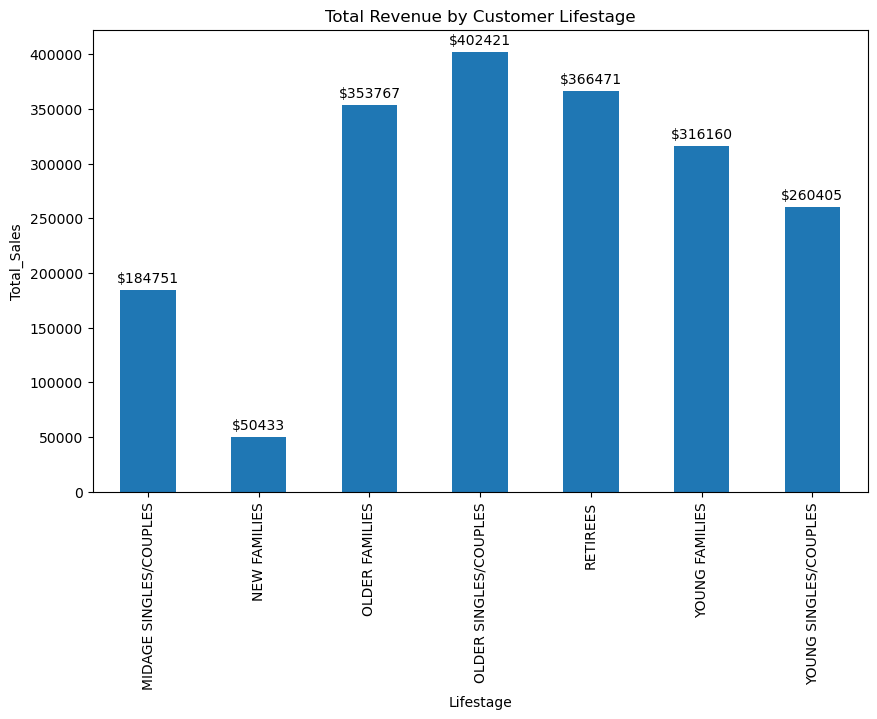

In [269]:
# Revenue by Lifestage
segment_revenue = merged.groupby('lifestage')['total_sales'].sum()
fig, ax= plt.subplots(figsize = (10,6))
segment_revenue.plot(kind= 'bar')
for container in ax.containers:
    ax.bar_label(container, fmt='$%.0f', padding=3)
plt.title('Total Revenue by Customer Lifestage')
plt.ylabel('Total_Sales')
plt.xlabel('Lifestage')
plt.xticks(rotation = 90)
plt.show()

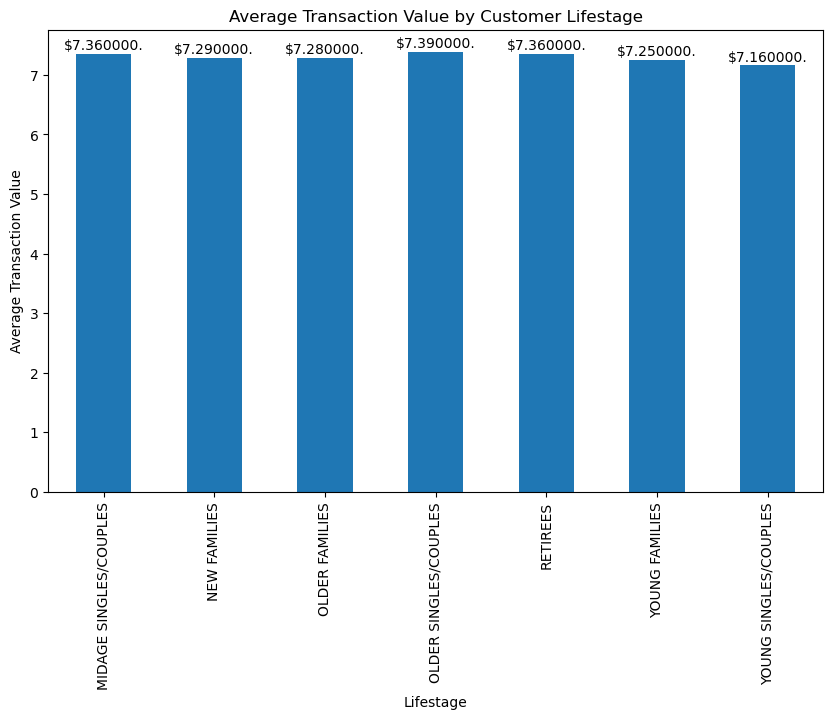

In [270]:
# Average Transaction Value by Segment
average_transaction_value = merged.groupby('lifestage')['total_sales'].mean().round(2)
fig, ax = plt.subplots(figsize = (10,6))
average_transaction_value.plot(kind = 'bar')
for container in ax.containers:
    ax.bar_label(container, fmt='$%f.', padding=1)
plt.title('Average Transaction Value by Customer Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation = 90)
plt.savefig('average_transaction_value.png')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

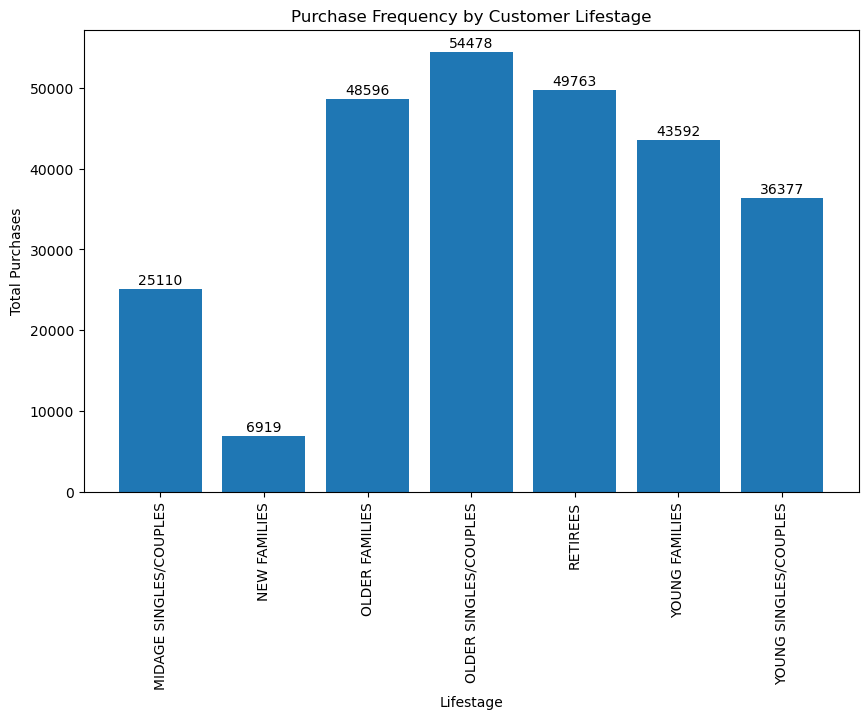

In [271]:
# Purchase Frequency by Segment 
purchase_by_lifestage = merged.groupby('lifestage')['transaction_id'].count()
fig, ax = plt.subplots(figsize = (10,6))
plt.bar(purchase_by_lifestage.index, purchase_by_lifestage.values)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=1)
plt.title('Purchase Frequency by Customer Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Total Purchases')
plt.xticks(rotation = 90)
plt.savefig('purchase_frequency.png')
plt.show

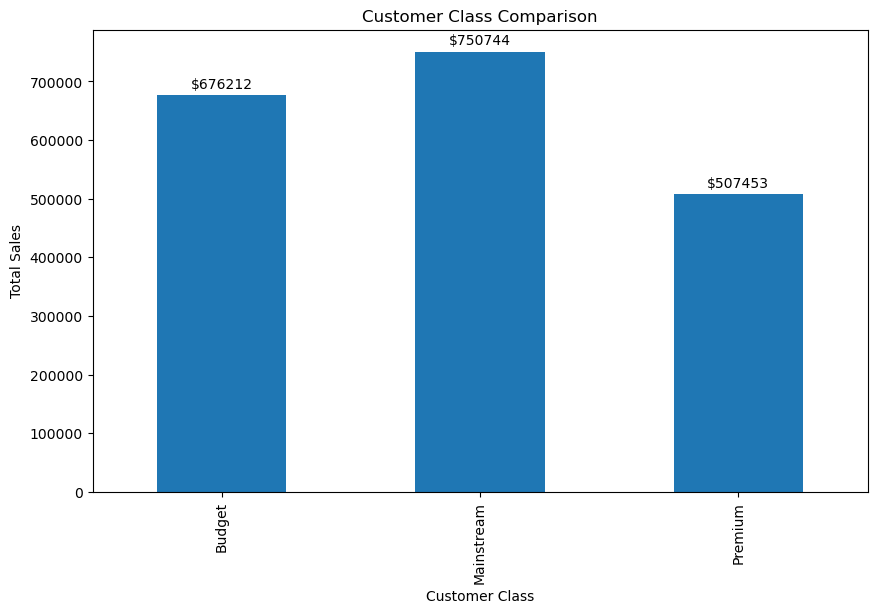

In [272]:
# Customer class Comparison
customer_type = merged.groupby('customer_class')['total_sales'].sum()
fig, ax = plt.subplots(figsize = (10,6))
customer_type.plot(kind = 'bar')
for container in ax.containers:
    ax.bar_label(container, fmt='$%.00f', padding=3,)
plt.title('Customer Class Comparison')
plt.xlabel('Customer Class')
plt.ylabel('Total Sales')
plt.savefig('customer_class_comparison.png')
plt.show()


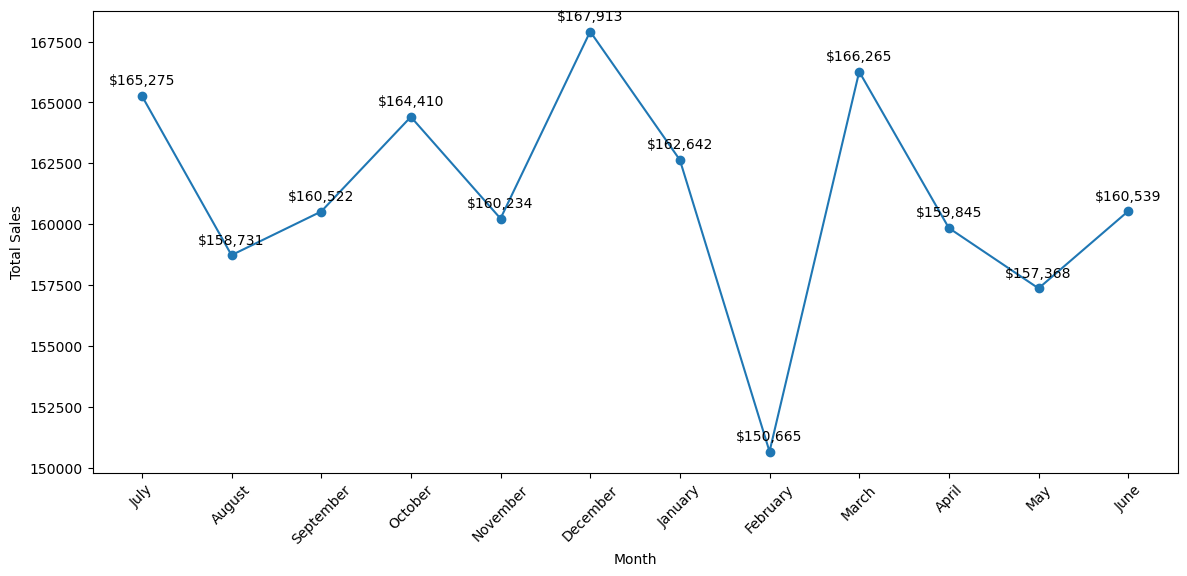

In [273]:
#Monthly Revenue trend
monthly_revenues = monthly_revenue.sort_values(by= ['year','month'], ascending = [True,True])
plt.figure(figsize=(14, 6))
ax = plt.gca()
plt.plot(range(len(monthly_revenues)), monthly_revenues['total_sales'], marker='o')
plt.xticks(range(len(monthly_revenues)), monthly_revenues['month_name'], rotation=45)

for i, value in enumerate(monthly_revenues['total_sales']):
    ax.annotate(f'${value:,.0f}',(i, value),textcoords='offset points',xytext=(0, 8),ha='center')
    
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.savefig('monthly_revenue.png')
plt.show()



In [274]:
top_products.drop(['quantity'], axis = 1, inplace = True)

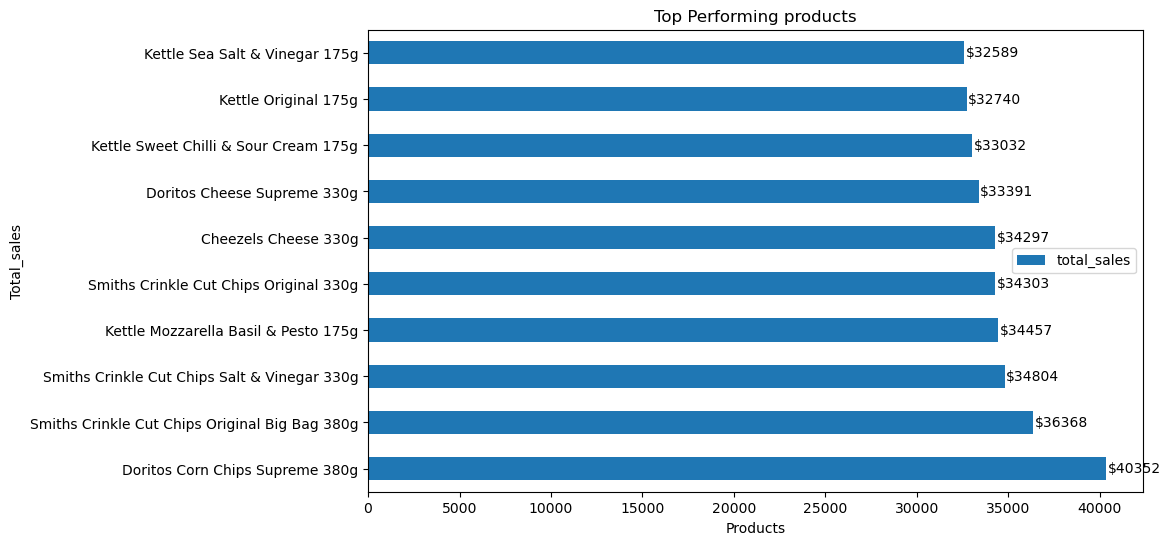

In [275]:
# Top performing products
fig, ax = plt.subplots(figsize = (10,6))
top_products.plot(kind = 'barh',ax = ax)
for container in ax.containers:
    ax.bar_label(container, fmt='$%.0f', padding=1)
plt.title('Top Performing products')
plt.xlabel('Products')
plt.ylabel('Total_sales')
plt.savefig('top_products.png')
plt.show()

In [276]:
#  EXECUTIVE SUMMARY

In [277]:
#Quantum Customer Purchase Behavior Analysis

## Business Question
#Which customer segments generate the most value, and what are their purchasing patterns?


In [278]:
# Dataset Overview
#- 264,836 transactions from 2018-07-01 to 2019-06-30
#- 72637 unique customers
#- 114 unique products across 272 stores

In [279]:
## KEY FINDINGS

In [280]:
# 1. Older Singles/Couples Customers Drive Most Revenue $402,420
#- Older Singles/Couples accounts for 20.8% of total revenue ($1,934,410)
#- Average transaction: $7.39 vs overall average of $7.30
#- They by higher weight products( all top 5 most purchased products weigh over 330g)

In [281]:
#2. Mainstream customers drive business revenue not Premium Customers(COUNTERINTUITIVE)

## **Revenue Distribution:**
#- Mainstream: $750,740 (38.8% of total revenue) from 29,245 customers
#- Budget: $676,210 (35% of total revenue) from 24,470 customers  
#- Premium: $507,450 (26.2% of total revenue) from 18,922 customers

# Why This Matters:
#- Contrary to typical assumptions that Premium customers drive business, our data shows Mainstream customers are the core revenue driver.
# This suggests:

#1. Resource Allocation: Marketing and retention efforts should prioritize Mainstream segment
#2. Premium Underperformance: Premium segment may be underserved or mis-targeted
#3. Volume Strategy: Success comes from volume of moderate spenders, not few high spenders

#Per-Customer Analysis:
#- Mainstream avg revenue: $[X] per customer
#- Premium avg revenue: $[Y] per customer  
#- Budget avg revenue: $[Z] per customer

In [282]:
### 3. Product Preferences Vary by Segment
#- Young families prefer: Doritos Corn Chips Supreme, Cheezels Cheese, Smiths Crinkle Cut Chips Original Big Bag
#- Retirees prefer: Doritos Corn Chips Supreme, Smiths Crinkle Cut Chips Original Big Bag,Kettle Mozzarella Basil & Pesto
#- Young singles/ couples prefer: Doritos Corn Chips Supreme, Smiths Crinkle Cut Chips Original Big Bag, Kettle Mozzarella Basil & Pesto
#- New families prefer: Doritos Corn Chips Supreme, Kettle Honey Soy Chicken, Smiths Crinkle Cut Chips Original Big Bag
#- Old singles/couples prefer: Doritos Corn Chips Supreme, Smiths Crinkle Cut Chips Original Big Bag, Smiths Crinkle Cut Chips Salt & Vinegar
#- Old families prefer: Doritos Corn Chips Supreme, Smiths Crinkle Cut Chips Salt & Vinegar, Smiths Crinkle Cut Chips Original
#- Midage singles/couples prefer: Smiths Crinkle Cut Chips Original Big Bag, Cheezels Cheese, Doritos Corn Chips Supreme
#- [Opportunity for targeted marketing]

In [283]:
### 4. Seasonal Pattern Identified
#- Peak months: December, March & July
#- While these peaks suggest seasonality, I recommend a Year-over-Year (YoY) Validation Study. 
#-- The business should maintain current marketing spend for these months 
#-- but tag transactions to see if the growth is driven by new customers or recurring "loyal" buyers

In [284]:
# RECOMENDATIONS

In [285]:
#- Based on Segment analysis
#1. Implement VIP loyalty program specifically targeting older singles/couples segment
#2. Develop targeted marketing campaigns for old singles/ couples, old families and retirees emphasizing convenience and value
#3. Purchase


In [286]:
# Based on Customer class(type)
#- 1 Investigate why Premium customers aren't generating expected revenue
#- 2 Double down on Mainstream retention programs
#- 3 Consider upselling Budget to Mainstream (higher ROI than Mainstream to Premium)

In [287]:
# Based on Products Preference
# Top 5 products are:(1,Doritos Corn Chips Supreme, 2,Smiths Crinkle Cut Chips Original Big Bag, 3,Smiths Crinkle Cut Chips Salt & Vinegar,
                       #4,Kettle Mozzarella Basil & Pesto, 5, Smiths Crinkle Cut Chips Original)
#- Cross-Promotion: Link Top 5 chip Stock Keeping Units(SKUs) with high-margin accompaniments (dips/beverages) to increase basket size.
#- Strategic Placement: Relocate top 5 products varieties to high-traffic end-cap displays to drive impulse purchases.
#- Inventory Optimization: Implement stricter "Safety Stock" levels for the Top 5 items to ensure 100% availability during peak hours.

In [288]:
#Based on timing
#1, Initiate Year-over-Year (YoY) tracking to confirm if these peaks repeat,
#-- allowing for more precise inventory ordering and marketing spend in the future 
# 2, Deploy secondary "Grab-and-Go" displays at the front of the store during these months to capitalize on impulse buying behavior.

In [289]:
#6. Project Limitations & Next Steps
# Note on Seasonality: 
#As this dataset represents a single 12-month cycle, the observed peaks in December, March, and July are treated as "High-Activity Periods" rather than 
# confirmed seasonal trends.
#To reach statistical significance, a second year of data is required to perform a Time-Series Decomposition 
# and isolate true seasonal effects from random noise.